# Mathematical Underpinnings - Lab 2

## Task 1

### a)
$\newcommand{\ind}{\perp\!\!\!\!\perp}$

$X \ind \epsilon$, 

$X_{i} \sim N(0, 1)$,   $\epsilon \sim N(0, \sigma^2)$, $Y = X + \epsilon$

$\mathbb{E}(X) = 0$

$\mathbb{E}(X^2) = 1$

$\mathbb{E}(XY) = \mathbb{E}(X^2 + X\epsilon) = \mathbb{E}(X^2) + \mathbb{E}(X)\mathbb{E}(\epsilon) = 1$ 

$\mathbb{E}(Y^2) = \mathbb{E}(X^2 + 2Y\epsilon + \epsilon^2) = 1 + \sigma^2$

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(a^2X^2 - 2aXY + Y^2) = a^2\mathbb{E}(X^2) -2a\mathbb{E}(XY) + \mathbb{E}(Y^2) = \mathbb{E}(a^2X^2 - 2aXY + Y^2) = a^2\mathbb{E}(X^2) -2a\mathbb{E}(XY) + \mathbb{E}(Y^2)= a^2 - 2a + 1 + \sigma^2 = (a-1)^2 + \sigma^2$



${L}(f(X), Y)$ <- loss function,   $a^*$ <- true a

In our task we know $a^* = 1$.

**How the minimum value changes with σ2?**

The minimum value does not depend on σ2, since $argmin_{a} (a-1)^2 + \sigma^2 = argmin_{a} (a-1)^2$.

In [2]:
def population_risk(a, sigma_eps):
    return (a-1)^2 + sigma_eps^2

def population_risk2(a):
    return (a-1)**2 + 1

### b)

In [54]:
# sampling
import numpy as np
np.random.seed(150)
n = 50
sigma = 1
X = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma, n)
a_0 = 1
Y = a_0 * X + eps
X, Y

(array([-2.31383247e-01,  3.90613228e-01,  3.58297467e-01,  5.66244478e-01,
         1.66233991e-01,  1.91341213e+00,  3.02902745e-01, -8.30826311e-01,
        -6.01423295e-02, -9.42941361e-02, -1.36774478e+00, -5.92518086e-01,
        -3.72465729e-01,  1.72776709e+00,  2.69285938e+00, -1.37586941e+00,
         1.95731570e+00, -1.46636077e+00, -1.34942344e-01, -1.94972345e+00,
         5.22374276e-01, -1.26113245e+00, -7.33598004e-02, -2.14093647e+00,
        -7.33201872e-01, -1.71478494e+00,  1.37022965e+00, -5.83354760e-04,
        -2.67424747e+00,  7.94300380e-01,  8.84039507e-01,  8.68761883e-01,
        -1.83573278e-01, -1.26425175e-01, -2.73405281e-01, -1.08656921e+00,
         2.33527568e-01, -7.01933604e-02,  1.28957684e+00,  1.18078268e+00,
         7.63322273e-01,  1.33704309e+00, -3.05126827e-01,  6.70456271e-01,
        -2.98222420e-01, -4.21632373e-01, -1.47005302e+00, -1.88429204e-01,
        -2.24658843e-01, -3.43033335e-01]),
 array([ 0.17788293, -0.27567402, -0.3057655

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

$\widehat{R(a,a^*)} = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(f(X_{i}), Y_{i})$

$ERM: \hat{a} = argmin_{a} \widehat{R(a,a^*)}$

In [4]:
def empirical_risk(a, x, y):
    n = len(x)
    return 1/n * (a*x - y)@(a*x - y).T

def empirical_risk2(a):
    x = X
    y = Y
    n = len(x)
    return 1/n * (a*x - y)@(a*x - y).T

### c)

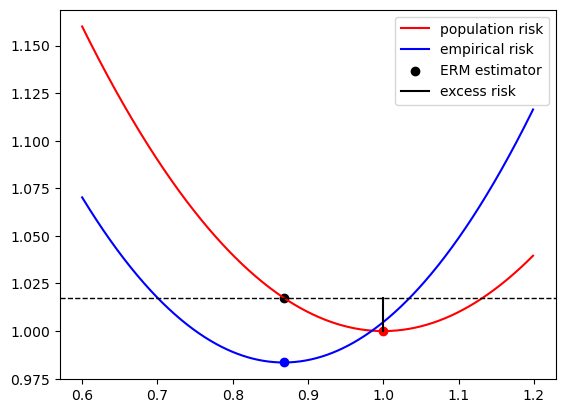

In [69]:
# code, plot
from scipy.optimize import minimize
import matplotlib.pyplot as plt
sigma=1

res1 = minimize(population_risk2, 1)
min_x_pop = res1["x"][0]
min_y_pop = res1["fun"]
res2 = minimize(empirical_risk2, 1)
min_x_emp = res2["x"][0]
min_y_emp = res2["fun"]
xx = np.arange(0.6, 1.2, 0.001)
xx = np.expand_dims(xx, 1)
y1 = np.apply_along_axis(population_risk2, 0, xx)
y2 = np.apply_along_axis(empirical_risk2, 1, xx)
plt.plot(xx, y1, c='red', label = 'population risk')
plt.plot(xx, y2, c='blue', label = 'empirical risk')
plt.scatter(min_x_pop, min_y_pop, c = 'red')
plt.scatter(min_x_emp, min_y_emp, c = 'blue')
plt.scatter(min_x_emp, population_risk2(min_x_emp), c = 'black', label='ERM estimator')
plt.axhline(y=population_risk2(min_x_emp), color='black', linestyle='--', linewidth=1)
plt.axvline(x=min_x_pop, ymin=0.13, ymax=0.22, color='black', linestyle='-', label='excess risk')
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [83]:
# excess risk
# simulations with fixed sample size
excess_risks = []
L = 200
n = 50
sigma = 1
res1 = minimize(population_risk2, 1)
min_y_pop = res1["fun"]
for i in(range(L)):
    X = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma, n)
    Y = X + eps
    emp_risk = lambda a: 1/n * (a*X - Y)@(a*X - Y).T
    res2 = minimize(emp_risk, 1)
    min_x_emp = res2["x"][0]
    diff = (population_risk2(min_x_emp) - min_y_pop)
    excess_risks.append(diff)  
np.mean(excess_risks) 

0.01707866662892013

In [30]:
# simulations for various sample sizes
N = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
L = 200
sigma = 1
mean_excess_risks = []
res1 = minimize(population_risk2, 1)
min_y_pop = res1["fun"]

for n in N:
    temp_excess_risks = []
    for i in(range(L)):
        X = np.random.normal(0, 1, n)
        eps = np.random.normal(0, sigma, n)
        Y = X + eps
        emp_risk = lambda a: 1/n * (a*X - Y)@(a*X - Y).T
        res2 = minimize(emp_risk, 1)
        min_x_emp = res2["x"][0]
        diff = (population_risk2(min_x_emp) - min_y_pop)
        temp_excess_risks.append(diff)  
    mean_excess_risks.append(np.mean(temp_excess_risks))

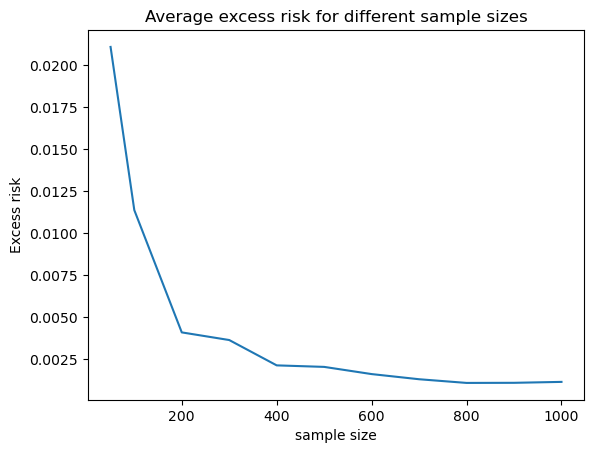

In [31]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.plot(N, mean_excess_risks)
plt.title('Average excess risk for different sample sizes')
plt.xlabel('sample size')
plt.ylabel('Excess risk')
plt.show()